# Ex.9
## Random Forest Classifier

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)

%time clf.fit(X_train, y_train)

CPU times: total: 28.8 s
Wall time: 49.6 s


RandomForestClassifier(random_state=42)

In [4]:
clf.score(X_test, y_test)

0.9705

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [12]:
clf_2 = RandomForestClassifier(random_state=42)
%time clf_2.fit(X_train_reduced, y_train)

CPU times: total: 1min 6s
Wall time: 2min 5s


RandomForestClassifier(random_state=42)

In [13]:
X_test_reduced = pca.transform(X_test)
clf_2.score(X_test_reduced, y_test)

0.9481

## Stochastic Gradient Descent Classifier

In [14]:
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier(random_state=42)

%time clf_sgd.fit(X_train, y_train)

CPU times: total: 1min 13s
Wall time: 2min 25s


SGDClassifier(random_state=42)

In [15]:
clf_sgd.score(X_test, y_test)

0.874

In [16]:
clf_sgd_2 = SGDClassifier(random_state=42)

%time clf_sgd_2.fit(X_train_reduced, y_train)

CPU times: total: 13.9 s
Wall time: 25.1 s


SGDClassifier(random_state=42)

In [17]:
clf_sgd_2.score(X_test_reduced, y_test)

0.8959

# Ex.10
## TSNE

In [26]:
from sklearn.manifold import TSNE

X_5000 = X_train[:5000]
y_5000 = y_train[:5000]
tsne_clf = TSNE(n_components=2, random_state=42).fit_transform(X_5000)
tsne_clf.shape

(5000, 2)

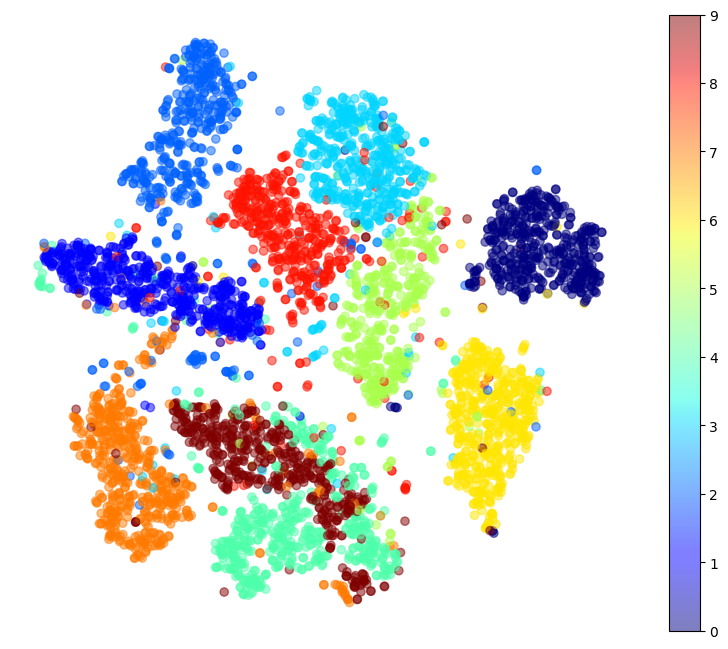

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
plt.scatter(tsne_clf[:, 0], tsne_clf[:, 1],
            c=y_5000.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

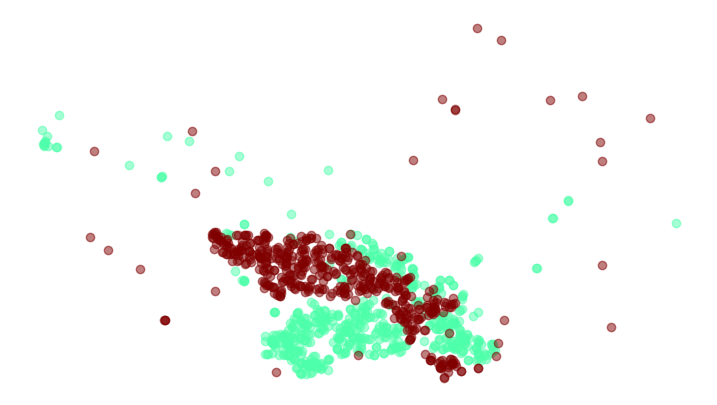

In [40]:
plt.figure(figsize=(9, 5))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(tsne_clf[y_5000 == digit, 0], tsne_clf[y_5000 == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

In [44]:
idx = (y_5000 == '4') | (y_5000 == '9')
X_subset = X_5000[idx]
y_subset = y_5000[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                   random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

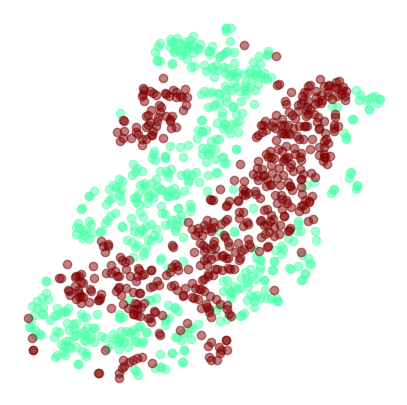

In [46]:
plt.figure(figsize=(5, 5))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

## PCA

In [47]:
pca_clf = PCA(n_components=2, random_state=42).fit_transform(X_5000)

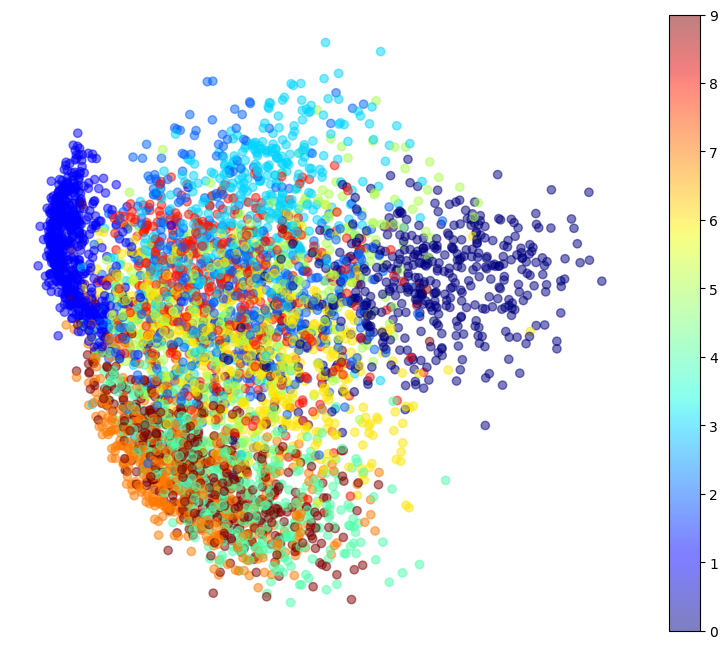

In [48]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_clf[:, 0], pca_clf[:, 1],
            c=y_5000.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

In [51]:
from sklearn.manifold import LocallyLinearEmbedding

LLE_clf = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X_5000)

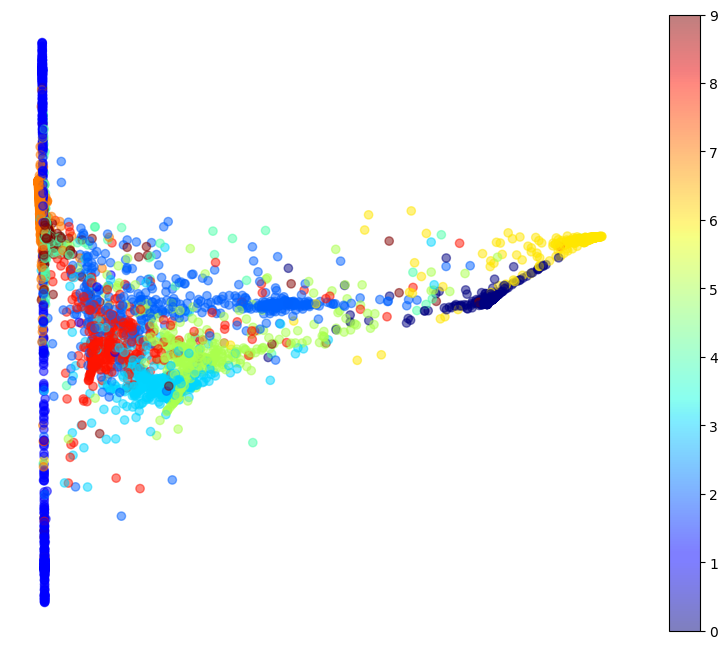

In [52]:
plt.figure(figsize=(10, 8))
plt.scatter(LLE_clf[:, 0], LLE_clf[:, 1],
            c=y_5000.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

## MDS

In [53]:
from sklearn.manifold import MDS

mds_clf = MDS(n_components=2, random_state=42).fit_transform(X_5000)

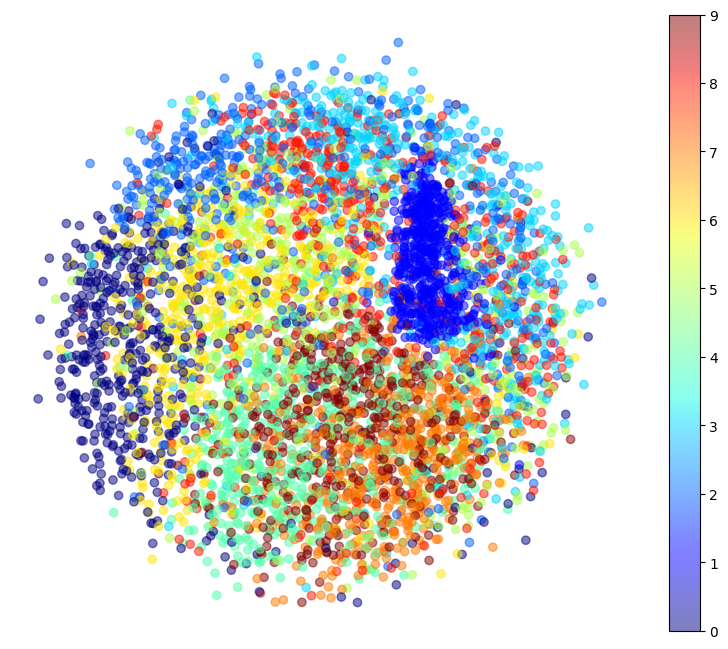

In [54]:
plt.figure(figsize=(10, 8))
plt.scatter(mds_clf[:, 0], mds_clf[:, 1],
            c=y_5000.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()